In [10]:
import torch

import utils
from option import args
from data import data
from trainer import Trainer

torch.manual_seed(args.seed)
checkpoint = utils.checkpoint(args)

if checkpoint.ok:
    my_loader = data(args).get_loader()
    t = Trainer(my_loader, checkpoint, args)
    while not t.terminate():
        t.train()
        t.test()

    checkpoint.done()

usage: ipykernel_launcher.py [-h] [--debug] [--template TEMPLATE]
                             [--n_threads N_THREADS] [--no_cuda]
                             [--n_GPUs N_GPUS] [--seed SEED]
                             [--dir_data DIR_DATA] [--data_train DATA_TRAIN]
                             [--data_test DATA_TEST] [--n_train N_TRAIN]
                             [--n_val N_VAL] [--offset_val OFFSET_VAL]
                             [--ext EXT] [--scale SCALE]
                             [--patch_size PATCH_SIZE] [--rgb_range RGB_RANGE]
                             [--n_colors N_COLORS] [--quality QUALITY]
                             [--chop_forward] [--model MODEL] [--act ACT]
                             [--pre_train PRE_TRAIN] [--extend EXTEND]
                             [--n_resblocks N_RESBLOCKS] [--n_feats N_FEATS]
                             [--res_scale RES_SCALE] [--shift_mean SHIFT_MEAN]
                             [--reset] [--test_every TEST_EVERY] [--test_only]


SystemExit: 2

/home/Sachit/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
from model import common

import torch.nn as nn

def make_model(args, parent=False):
    return EDSR(args)

class EDSR(nn.Module):
    def __init__(self, args, conv=common.default_conv):
        super(EDSR, self).__init__()

        n_resblock = args.n_resblocks
        n_feats = args.n_feats
        kernel_size = 3 
        scale = args.scale[0]
        act = nn.ReLU(True)

        rgb_mean = (0.4488, 0.4371, 0.4040)
        self.sub_mean = common.MeanShift(args.rgb_range, rgb_mean, -1)
        
        # define head module
        modules_head = [conv(args.n_colors, n_feats, kernel_size)]

        # define body module
        modules_body = [
            common.ResBlock(
                conv, n_feats, kernel_size, act=act, res_scale=args.res_scale) \
            for _ in range(n_resblock)]
        modules_body.append(conv(n_feats, n_feats, kernel_size))

        # define tail module
        modules_tail = [
            common.Upsampler(conv, scale, n_feats, act=False),
            conv(n_feats, args.n_colors, kernel_size)]

        self.add_mean = common.MeanShift(args.rgb_range, rgb_mean, 1)

        self.head = nn.Sequential(*modules_head)
        self.body = nn.Sequential(*modules_body)
        self.tail = nn.Sequential(*modules_tail)

    def forward(self, x):
        x = self.sub_mean(x)
        x = self.head(x)

        res = self.body(x)
        res += x

        x = self.tail(res)
        x = self.add_mean(x)

        return x 

    def load_state_dict(self, state_dict, strict=True):
        own_state = self.state_dict()
        for name, param in state_dict.items():
            if name in own_state:
                if isinstance(param, nn.Parameter):
                    param = param.data
                try:
                    own_state[name].copy_(param)
                except Exception:
                    if name.find('tail') == -1:
                        raise RuntimeError('While copying the parameter named {}, '
                                           'whose dimensions in the model are {} and '
                                           'whose dimensions in the checkpoint are {}.'
                                           .format(name, own_state[name].size(), param.size()))
            elif strict:
                if name.find('tail') == -1:
                    raise KeyError('unexpected key "{}" in state_dict'
                                   .format(name))

        if strict:
            missing = set(own_state.keys()) - set(state_dict.keys())
            if len(missing) > 0:
                raise KeyError('missing keys in state_dict: "{}"'.format(missing))

In [3]:
from dataload

In [ ]:
my_loader = dataloader.

In [4]:
from data import data

In [13]:
from EDSR import EDSR

ModuleNotFoundError: No module named 'EDSR'

In [5]:
my_loader = data.get_loader()

TypeError: get_loader() missing 1 required positional argument: 'self'

In [1]:
import bcolz
import numpy as np
import utils
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [7]:
a = utils.load_array('../experiment/lr_find_edsr2/lr_history_epoch1.bc')
b = utils.load_array('../experiment/lr_find_edsr2/loss_history_epoch1.bc')

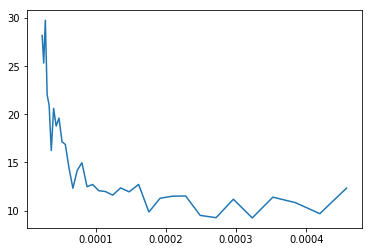

In [10]:
plt.plot(a,b)

In [24]:
c = utils.load_array('../experiment/cos_ann2/lr_history_epoch2.bc')

In [29]:
d = np.array(list(range(len(c))))*16

In [30]:
d

array([   0,   16,   32,   48,   64,   80,   96,  112,  128,  144,  160,
        176,  192,  208,  224,  240,  256,  272,  288,  304,  320,  336,
        352,  368,  384,  400,  416,  432,  448,  464,  480,  496,  512,
        528,  544,  560,  576,  592,  608,  624,  640,  656,  672,  688,
        704,  720,  736,  752,  768,  784,  800,  816,  832,  848,  864,
        880,  896,  912,  928,  944,  960,  976,  992, 1008, 1024, 1040,
       1056, 1072, 1088, 1104, 1120, 1136, 1152, 1168, 1184, 1200, 1216,
       1232, 1248, 1264, 1280, 1296, 1312, 1328, 1344, 1360, 1376, 1392,
       1408, 1424, 1440, 1456, 1472, 1488, 1504, 1520, 1536, 1552, 1568,
       1584])

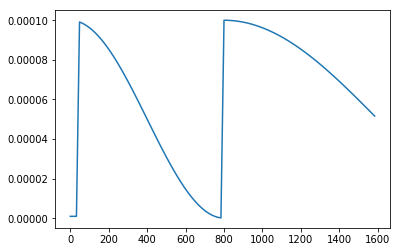

In [31]:
plt.plot(d,c)

In [18]:
c.shape

(50,)